## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
# Import libraries 
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
# Import Dataset
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
# Check df_od by showing top 5
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
# Check df_pd by showing top 5
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
# Check df_cd by showing top 5
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
# Check df_sd by showing top 5
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [7]:
# running SQL in Jupyter Notebook
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
# running SQL in Jupyter Notebook
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

# Combine data using SQL
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [42]:
# Change the data type to make data processing easier
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                            object
customer_id                   object
order_date            datetime64[ns]
sku_id                        object
price                          int64
qty_ordered                    int64
before_discount                int64
discount_amount                int64
after_discount                 int64
is_gross                       int64
is_valid                       int64
is_net                         int64
payment_id                     int64
payment_method                object
sku_name                      object
base_price                     int64
cogs                           int64
category                      object
registered_date       datetime64[ns]
day                           object
day_num                        int64
month                         object
month_num                      int64
status_week                   object
Period                        object
Avg Weekend Sales            float64
Avg Weekdays Sales           float64
D

In [45]:
# Checking Dataframe for the last time
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,day_num,month,month_num,status_week,Period,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%),year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,19,November,11,Weekday,Total 3 months,558865.15,770146.01,-211280.86,-37.81%,2021
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,19,November,11,Weekday,Total 3 months,558865.15,770146.01,-211280.86,NaN,2021
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,25,November,11,Weekday,Total 3 months,558865.15,770146.01,-211280.86,NaN,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,22,November,11,Weekday,Total 3 months,558865.15,770146.01,-211280.86,NaN,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,21,November,11,Weekend,Total 3 months,558865.15,770146.01,-211280.86,NaN,2021


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [49]:
# Filter data with is_valid = 1, category = Mobiles & Tablets, and transactions during 2022
filtered_1 = df[(df['is_valid'] == 1) & (df['category'] == 'Mobiles & Tablets') & (df['order_date'].dt.year == 2022)]

# group data based on sku_name with total quantity and sort by quantity amount
no_1 = filtered_1.groupby('sku_name').agg(qty_2022=('qty_ordered', 'sum')).sort_values(by='qty_2022', ascending=False)\
.reset_index()

# Call result
no_1 = no_1.head(5)
no_1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


In [14]:
# Using SQL
df_sql = pd.read_sql("""
SELECT
    sku_detail.sku_name,
    sum(order_detail.qty_ordered) qty
from
    order_detail
JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
where
    is_valid = 1
    AND category = 'Mobiles & Tablets'
    AND strftime('%Y',order_date) IN('2022')
group by
    1
order by
    2 desc
limit 5
""", conn)
df_sql

,sku_name,qty
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,samsung_Grand Prime Plus-Silver,10


<AxesSubplot:title={'center':'TOP 5 Product'}, ylabel='Product Name'>

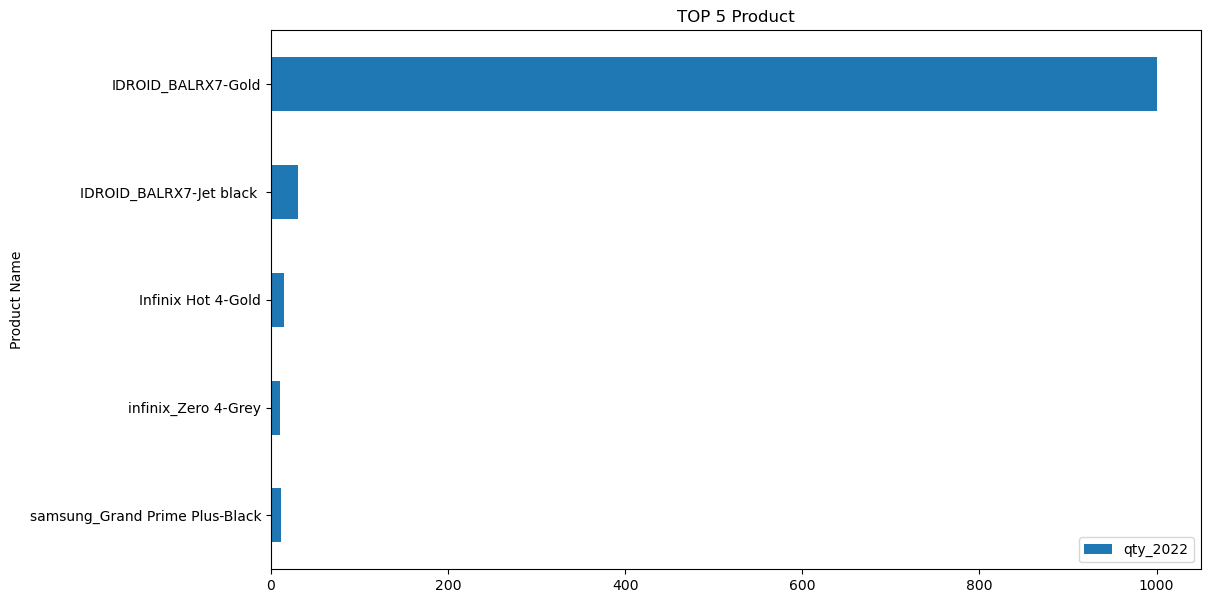

In [35]:
# Make Data Visualization
no_1.sort_values(by='sku_name', ascending=False).plot(x='sku_name',
           y=['qty_2022'],
           kind='barh',
           grid = False,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Product',
           table = False,
           sort_columns = False,
           secondary_y = False)

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [16]:
# Apply filters according to needs
df_2021 = df[(df['order_date'].dt.year == 2021) & (df['is_valid'] == 1)]
result_2021 = df_2021.groupby('category').agg(qty_2021 = ('qty_ordered', 'sum')).reset_index()

df_2022 = df[(df['order_date'].dt.year == 2022) & (df['is_valid'] == 1)]
result_2022 = df_2022.groupby('category').agg(qty_2022 = ('qty_ordered', 'sum')).reset_index()

# Merge Data
merged_result = result_2021.merge(result_2022, on='category', how='outer')

# Create a new column named qty_ordered which contains qty_2022 - qty_2021
merged_result['qty_growth'] = merged_result['qty_2022'] - merged_result['qty_2021']
merged_result.sort_values(by='qty_growth', inplace=True)

merged_result

,category,qty_2021,qty_2022,qty_growth
10,Others,426,263,-163
12,Soghaat,759,612,-147
8,Men Fashion,237,175,-62
1,Beauty & Grooming,168,153,-15
0,Appliances,124,148,24
2,Books,171,195,24
5,Health & Sports,173,200,27
3,Computing,109,153,44
11,School & Education,184,237,53
6,Home & Living,193,250,57


In [17]:
# Using Pivot Table
no_2 = df[df['is_valid'] == 1]

no_2 = pd.pivot_table(no_2, 
                             index='category',
                             columns=df['order_date'].dt.year,
                             values='qty_ordered',
                             aggfunc='sum',
                             fill_value=0)
no_2

order_date,2021,2022
category,,
Appliances,124,148
Beauty & Grooming,168,153
Books,171,195
Computing,109,153
Entertainment,77,150
Health & Sports,173,200
Home & Living,193,250
Kids & Baby,170,227
Men Fashion,237,175


## `Jawaban No 2.2`

In [18]:
# Apply filters according to needs
df_20211 = df[(df['order_date'].dt.year == 2021) & (df['is_valid'] == 1) & (df['category'] == 'Others')]
result_20211 = df_20211.groupby('sku_name').agg(qty_2021=('qty_ordered', 'sum')).reset_index()

df_20222 = df[(df['order_date'].dt.year == 2022) & (df['is_valid'] == 1) & (df['category'] == 'Others')]
result_20222 = df_20222.groupby('sku_name').agg(qty_2022=('qty_ordered', 'sum')).reset_index()

# Merge Data
merged_resultt = result_20211.merge(result_20222, on='sku_name', how='outer').fillna(0)

# Create a new column named qty_ordered which contains qty_2022 - qty_2021
merged_resultt['qty_growth'] = merged_resultt['qty_2022'] - merged_resultt['qty_2021']
merged_resultt = merged_resultt.sort_values(by='qty_growth', ascending=True)

# change the data type to integer
merged_resultt[['qty_2021','qty_2022','qty_growth']] = merged_resultt[['qty_2021','qty_2022','qty_growth']].astype(int)

merged_resultt.head(20)

,sku_name,qty_2021,qty_2022,qty_growth
39,RB_Dettol Germ Busting Kit-bf,200,45,-155
11,Dawlance_MD 10 + DWB 600,23,0,-23
43,Telemall_MM-DR-HB-L,23,2,-21
69,iu_Tickets General Enclosure-Islamabad,20,0,-20
40,RS_Rehmat-e-Shereen Mix Mithai,13,0,-13
73,kansai_NeverWet,10,1,-9
80,sindbad_Sindbad Gift Card-3,7,0,-7
66,emart_00-1,7,1,-6
2,Am-PTV_ATS-004-M,5,0,-5
50,Vouch 365 2016,5,0,-5


In [19]:
# Create filter
df_others = df[(df['category'] == 'Others') & (df['is_valid'] == 1)]

# Using Pivot Table
pvt = df_others.pivot_table(index='sku_name',
                                    columns=df_others['order_date'].dt.year,
                                    values='qty_ordered',
                                    aggfunc='sum',
                                    fill_value=0)

# Create new column
pvt['loss'] = pvt[2022] - pvt[2021]

# sort values and show
pvt = pvt.sort_values(by='loss', ascending=True)
pvt.head(20)

order_date,2021,2022,loss
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200,45,-155
Dawlance_MD 10 + DWB 600,23,0,-23
Telemall_MM-DR-HB-L,23,2,-21
iu_Tickets General Enclosure-Islamabad,20,0,-20
RS_Rehmat-e-Shereen Mix Mithai,13,0,-13
kansai_NeverWet,10,1,-9
sindbad_Sindbad Gift Card-3,7,0,-7
emart_00-1,7,1,-6
Vouch 365 2016,5,0,-5


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [54]:
# Filter data with is_gross = 1, is_valid = 0, is_net = 0 and transactions during 2022
filtered_customers = df[(df['is_gross'] == 1) & (df['is_valid'] == 0) & (df['is_net'] == 0) & (df['order_date']\
                                                                                               .dt.year == 2022)]

# display the selected columns which is customer_id and registered_date
no_3 = filtered_customers[['customer_id', 'registered_date']].drop_duplicates()
no_3.set_index('customer_id')

,registered_date
customer_id,
C246762L,2022-05-08
C848774L,2021-11-07
C693415L,2022-04-12
C180595L,2022-04-22
C587425L,2022-03-22
...,...
C653797L,2022-04-03
C394076L,2021-10-12
C248585L,2022-07-10


In [21]:
# Download data using Google Colab
from google.colab import files
[nama variabel file].to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False)
files.download('audience_list.csv')

In [22]:
# Download data using Jupyter notebook
no_3.to_csv('audience_list.csv', encoding='utf-8-sig', index=False)
print("CSV file 'audience_list.csv' has been created.")

CSV file 'audience_list.csv' has been created.


## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [52]:
# Create new columns
df['day']=df['order_date'].dt.day_name()
df['day_num']=df['order_date'].dt.day
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month

# Create a new function to determine the day type
def categorize_day(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

# Create new column which contains day type
df['status_week'] = df['day'].apply(categorize_day)

In [53]:
# Apply filters according to needs
filter_4 = df[(df['is_valid'] == 1) & (df['month_num'] >= 10) & (df['month_num'] <= 12) & (df['order_date']\
                                                                                           .dt.year == 2022)]

# Filter status_week and group data by month number and month name with aggregate which calculates the average of sales
weekend_mean = filter_4[filter_4['status_week']=='Weekend'].groupby(['month_num','month']).\
agg(avg_sales_weekend=('before_discount', 'mean')).reset_index()
weekday_mean = filter_4[filter_4['status_week']=='Weekday'].groupby(['month_num','month']).\
agg(avg_sales_weekday=('before_discount', 'mean')).reset_index()

# Merge data
merged_4_1 = weekend_mean.merge(weekday_mean, on='month', how='outer').fillna(0)

# Create 2 column diff average sales between weekend and weekday and diff with percent
merged_4_1['diff_value'] = merged_4_1['avg_sales_weekend'] - merged_4_1['avg_sales_weekday']
merged_4_1['Diff (%)'] = (round((merged_4_1['avg_sales_weekend'] - merged_4_1['avg_sales_weekday']) / \
                                merged_4_1['avg_sales_weekend'] * 100, 0)).astype(str) + '%'

# show selected columns 
merged_4_1 = merged_4_1[['month', 'avg_sales_weekend', 'avg_sales_weekday', 'diff_value', 'Diff (%)']]
merged_4_1

,month,avg_sales_weekend,avg_sales_weekday,diff_value,Diff (%)
0,October,634260.074074,874690.266667,-240430.192593,-38.0%
1,November,607794.210526,641862.000000,-34067.789474,-6.0%
2,December,410599.400000,813574.285714,-402974.885714,-98.0%


In [24]:
# wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
# we = ['Sunday', 'Saturday']

# def categorize_day(day):
#     return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

# conditions = (
#     (df['order_date'].dt.year == 2022) & 
#     (df['month_num'].between(10, 12)) & 
#     (df['is_valid'] == 1) &
#     (df['day'].isin(wd) | df['day'].isin(we))
# )

# df['status_week'] = df['day'].apply(categorize_day)

# dfhasil = df[conditions].groupby(['month_num','month', 'status_week']).agg(rata_rata=('before_discount', 'mean')).astype(int).reset_index()
# dfhasil = dfhasil[['month', 'status_week', 'rata_rata']]

# dfhasil

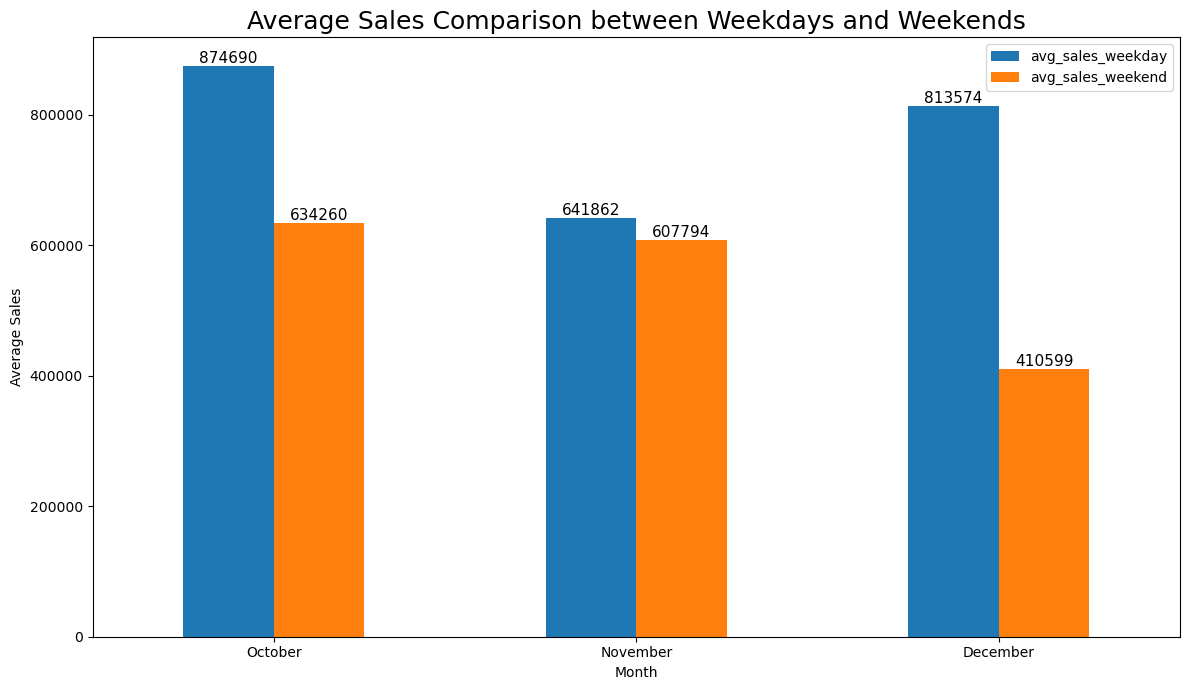

In [56]:
# Data Visualization
ax = merged_4_1.plot(x='month',
           y=['avg_sales_weekday','avg_sales_weekend'],
           kind='bar',
           grid = False,
           xlabel = 'Month',
           ylabel = 'Average Sales',
           figsize=(12,7),
           rot = 0,
           table = False,
           secondary_y = False)


# Set title
ax.set_title('Average Sales Comparison between Weekdays and Weekends', fontsize=18)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

# Show Visualization
plt.tight_layout()
plt.show()

## `Jawaban No 4.2`

In [59]:
# create a duplicate df named df_2
df_2 = df

# create filter weekend and weekday
filter_we = filter_4[(filter_4['status_week']=='Weekend')]
filter_wd = filter_4[(filter_4['status_week']=='Weekday')]

# Create several columns
df_2['Period'] = 'Total 3 months'
df_2['Avg Weekend Sales'] = round(filter_we['before_discount'].mean(),2)
df_2['Avg Weekdays Sales'] = round(filter_wd['before_discount'].mean(),2)
df_2['Diff (Value)'] = round(filter_we['before_discount'].mean() - filter_wd['before_discount'].mean(),2)
df_2['Diff (%)'] = pd.Series(round(((filter_we['before_discount'].mean() - filter_wd['before_discount'].mean())\
                                    /filter_we['before_discount'].mean())*100,2), dtype=str)+'%'

# show selected columns
df_2 = df_2[['Period', 'Avg Weekend Sales', 'Avg Weekdays Sales', 'Diff (Value)', 'Diff (%)']]
df_2.iloc[[0]]

,Period,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,558865.15,770146.01,-211280.86,-37.81%
